# Introduction and Hypothesis Analysis for Airbnb in NYC

The dataset under consideration delves into the ever-changing world of Airbnb listings in New York City (NYC). This information trove contains a wealth of details about the city's Airbnb landscape, including insights into the diverse range of accommodations available, their geographical distribution, and the various factors influencing their availability and pricing.

This database has been sourced from: #https://www.kaggle.com/datasets/thedevastator/airbnbs-nyc-overview/data

A valuable dataset platform that allows for exploration and analysis across a wide range of domains. The dataset, which is a snapshot of the Airbnb ecosystem in New York City, has the potential to reveal patterns, trends, and inherent characteristics of the local short-term rental market.

**Listing Information:**
Name: The distinctive name of the Airbnb listing.
Host Name: The name of the individual hosting the Airbnb property,
Neighbourhood Group: The specific group or borough within NYC where the listing is situated.

**Geographical Coordinates:**
Latitude: The geographical latitude coordinate of the Airbnb listing,
Longitude: The geographical longitude coordinate of the Airbnb listing.

**Accommodation Details:**
Room Type: The type of room offered, such as entire home/apartment, private room, or shared room,
Price: The cost per night for booking the Airbnb listing,
Minimum Nights: The minimum number of nights required for booking,
Number of Reviews: The total count of reviews received by the listing,
Last Review: The date of the last review received by the listing,
Reviews per Month: The average number of reviews received per month.

**Host Metrics:**
Calculated Host Listings Count: The total number of listings managed by the host,
Availability 365: The number of days in a year that the Airbnb listing is available for booking.

**Hypothesis Analysis:**

1.Pricing Trends by Neighborhood and Room Type:

Examining average pricing for various neighborhood groups and room types.

Statistical tests are run to validate observed differences.

2.Distribution of the Room Types:

Examining the number of each room type within neighborhood groups.

Seeing if the distribution varies significantly across neighborhoods.

3.Minimum number of nights and room types:

Examining the average number of nights needed to book each room type.

determining whether minimum nights differ significantly between room types.


# Packages, Libraries, and Data Import

In [427]:
# Importing all libraries and packages
 
import warnings

warnings.filterwarnings("ignore")  # This is to ignore any warnings that might pop up during execution

# Basic libraries to manipulate data
import matplotlib.pyplot as plt

import numpy as np  

import pandas as pd 

import plotly.express as px

import seaborn as sns

from scipy import stats

from matplotlib.colors import Normalize

from scipy.stats import ttest_ind
 
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder
 
np.random.seed(42)

In [428]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
airbnb_filename = "train.csv"

# Read the CSV files and create backup copies
airbnb_df_data = pd.read_csv(data_path + airbnb_filename)

# Create working copies of the dataframes for analysis
airbnb_df = airbnb_df_data.copy()

In [429]:
pd.set_option('display.max_columns', None)
airbnb_df.sample(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2019-01-02,0.71,1,189
44383,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73
15394,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,2017-04-28,0.43,1,0
43230,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2019-06-02,1.88,327,272
16332,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,2019-06-03,0.80,1,30
5966,4365276,Entire 2BR APT (not a railroad),3081990,Amanda,Brooklyn,Williamsburg,40.70698,-73.95406,Entire home/apt,170,1,141,2019-06-22,3.05,1,28


In [430]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [431]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Analysing Price column

In [432]:
airbnb_df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [433]:
airbnb_df['price'].value_counts(dropna=False)

price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

As we can see there are no values in the price column

# Numeric Column Analysis

In [434]:
def find_non_convertible_floats(series):

    non_convertibles = set()
    for item in series:
        try:
            float(item)  # Try converting to float
        except ValueError:
            non_convertibles.add(item)  # Add to set if conversion fails
    return non_convertibles

In [435]:
find_non_convertible_floats(airbnb_df['price'])

set()

In [436]:
# we can convert it to the float dtype
airbnb_df['price']=airbnb_df['price'].astype(float)

In [437]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Changing all int64 into float64

In [438]:
for col in airbnb_df :
    if airbnb_df[col].dtypes == 'int64' :
        airbnb_df[col]=airbnb_df[col].astype('float64')

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  float64
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  float64
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  float64
 10  minimum_nights                  48895 non-null  float64
 11  number_of_reviews               48895 non-null  float64
 12  last_review                     

# Creating a categorical variable 

To find categorical columns in the dataset, we can look at the unique values and their frequencies. This investigation provides insights into columns with discrete data that does not follow a specific order, making them ideal candidates for categorical representation.

In [439]:
def price_category(price):
    if price <= 100:
        return 'low'
    elif 100 < price <= 200:
        return 'medium'
    else:
        return 'high'

In [440]:
airbnb_df['price category'] = airbnb_df['price'].apply(price_category)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,medium
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,high
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0,medium
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,low
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,low


In [441]:
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [442]:
airbnb_df['neighbourhood_group'].value_counts(dropna=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [443]:
airbnb_df['neighbourhood_group']=airbnb_df['neighbourhood_group'].astype('category')

In [444]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  float64 
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  float64 
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  object  
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  object  
 9   price                           48895 non-null  float64 
 10  minimum_nights                  48895 non-null  float64 
 11  number_of_reviews               48895 non-null  float64 
 12  last_review       

In [445]:
airbnb_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [446]:
airbnb_df['neighbourhood'].value_counts(dropna=False)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [447]:
airbnb_df['neighbourhood']=airbnb_df['neighbourhood'].astype('category')

In [448]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  float64 
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  float64 
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  object  
 9   price                           48895 non-null  float64 
 10  minimum_nights                  48895 non-null  float64 
 11  number_of_reviews               48895 non-null  float64 
 12  last_review       

# Changing dtypes 

In [449]:
for x in ['room_type', 'last_review']:
    airbnb_df[x]=airbnb_df[x].str.lower()
    airbnb_df[x]=airbnb_df[x].astype('category')

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  float64 
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  float64 
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  category
 9   price                           48895 non-null  float64 
 10  minimum_nights                  48895 non-null  float64 
 11  number_of_reviews               48895 non-null  float64 
 12  last_review       

# Data cleaning

Checking and Removing NaN values

In [450]:
# Checking and Removing NaN Values
airbnb_df.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [451]:
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price category                        0
dtype: int64

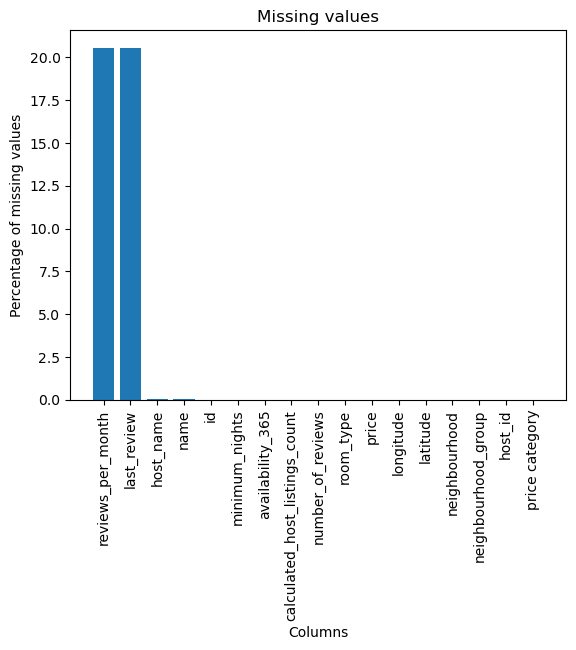

In [452]:
def visualize_null(dataframe,percentage=True):
    null_series=airbnb_df.isna().sum().sort_values(ascending=False)
    if percentage:
        null_series=null_series/len(dataframe)*100

    plt.bar(x=null_series.index,height=null_series.values)

    if percentage:
        plt.ylabel('Percentage of missing values')
    else:
        plt.ylabel('Amount of missing values')
    plt.title('Missing values')
    plt.xlabel('Columns')
    plt.xticks(rotation=90)
    plt.show()

visualize_null(airbnb_df)

**Identifying Categorical Columns:** In the first step, we used a boolean check to identify categorical columns by determining whether each entry is unique within its column. The outcome provided a clear understanding of which columns exhibit categorical characteristics, which is necessary for further analysis.

**Handling Missing Values:** We used the 'isna().sum()' method to check for the presence of missing values in the dataset. Columns like 'last_review' and'reviews_per_month' had a significant number of missing values. This awareness is critical for determining appropriate strategies for dealing with missing data in subsequent cleaning steps, such as imputation or removal.

**Missing Values Visualization:** To better understand the distribution of missing values, we created a visual representation using a bar plot. This visualization emphasizes the columns with the highest percentage of missing values, allowing for a more targeted approach to addressing data gaps during the cleaning process.

**Data Cleaning:** To effectively visualize missing values during the cleaning phase, we created a function called visualize_null. The function includes the option to display percentages, making it a versatile tool for determining the extent of missing data. This step lays the groundwork for making informed decisions about how to handle missing values in subsequent analyses.

**Columns Removed:** We can clearly state that, no columns were removed during the data cleaning process. The primary focus was on visualizing and comprehending missing values, laying the groundwork for future imputation or removal strategies as needed.



In [453]:
# An example of those with missing values

missing_data=airbnb_df[airbnb_df.isna().sum(axis=1)>0]
missing_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price category
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0,medium
19,7750.0,Huge 2 BR Upper East Cental Park,17985.0,Sing,Manhattan,East Harlem,40.79685,-73.94872,entire home/apt,190.0,7.0,0.0,NaN,NaN,2.0,249.0,medium
26,8700.0,Magnifique Suite au N de Manhattan - vue Cloitres,26394.0,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,private room,80.0,4.0,0.0,NaN,NaN,1.0,0.0,low
36,11452.0,Clean and Quiet in Brooklyn,7355.0,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,private room,35.0,60.0,0.0,NaN,NaN,1.0,365.0,low
38,11943.0,Country space in the city,45445.0,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,private room,150.0,1.0,0.0,NaN,NaN,1.0,365.0,medium


In [454]:
# Remove the specified columns from airbnb_df
columns_to_drop = ['last_review', 'reviews_per_month']
airbnb_df = airbnb_df.drop(columns=columns_to_drop)

In [455]:
# Remove the specified rows from airbnb_df
airbnb_df.dropna(inplace=True)

In [456]:
# Double-check to see if the columns and rows have been deleted
airbnb_df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
price category                    0
dtype: int64

In [457]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48858 non-null  float64 
 1   name                            48858 non-null  object  
 2   host_id                         48858 non-null  float64 
 3   host_name                       48858 non-null  object  
 4   neighbourhood_group             48858 non-null  category
 5   neighbourhood                   48858 non-null  category
 6   latitude                        48858 non-null  float64 
 7   longitude                       48858 non-null  float64 
 8   room_type                       48858 non-null  category
 9   price                           48858 non-null  float64 
 10  minimum_nights                  48858 non-null  float64 
 11  number_of_reviews               48858 non-null  float64 
 12  calculated_host_listing

# Checking for and Eliminating Duplicates

In [458]:
airbnb_df[airbnb_df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price category


**We can see that there are no duplicates here.** 

# Examining and Eliminating Unexpected/Incorrect Data

In [459]:
    #First, select all columns with numerical values.

    numeric_airbnb_df = airbnb_df.select_dtypes(np.number)
    numeric_airbnb_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539.0,2787.0,40.64749,-73.97237,149.0,1.0,9.0,6.0,365.0
1,2595.0,2845.0,40.75362,-73.98377,225.0,1.0,45.0,2.0,355.0
2,3647.0,4632.0,40.80902,-73.94190,150.0,3.0,0.0,1.0,365.0
3,3831.0,4869.0,40.68514,-73.95976,89.0,1.0,270.0,1.0,194.0
4,5022.0,7192.0,40.79851,-73.94399,80.0,10.0,9.0,1.0,0.0


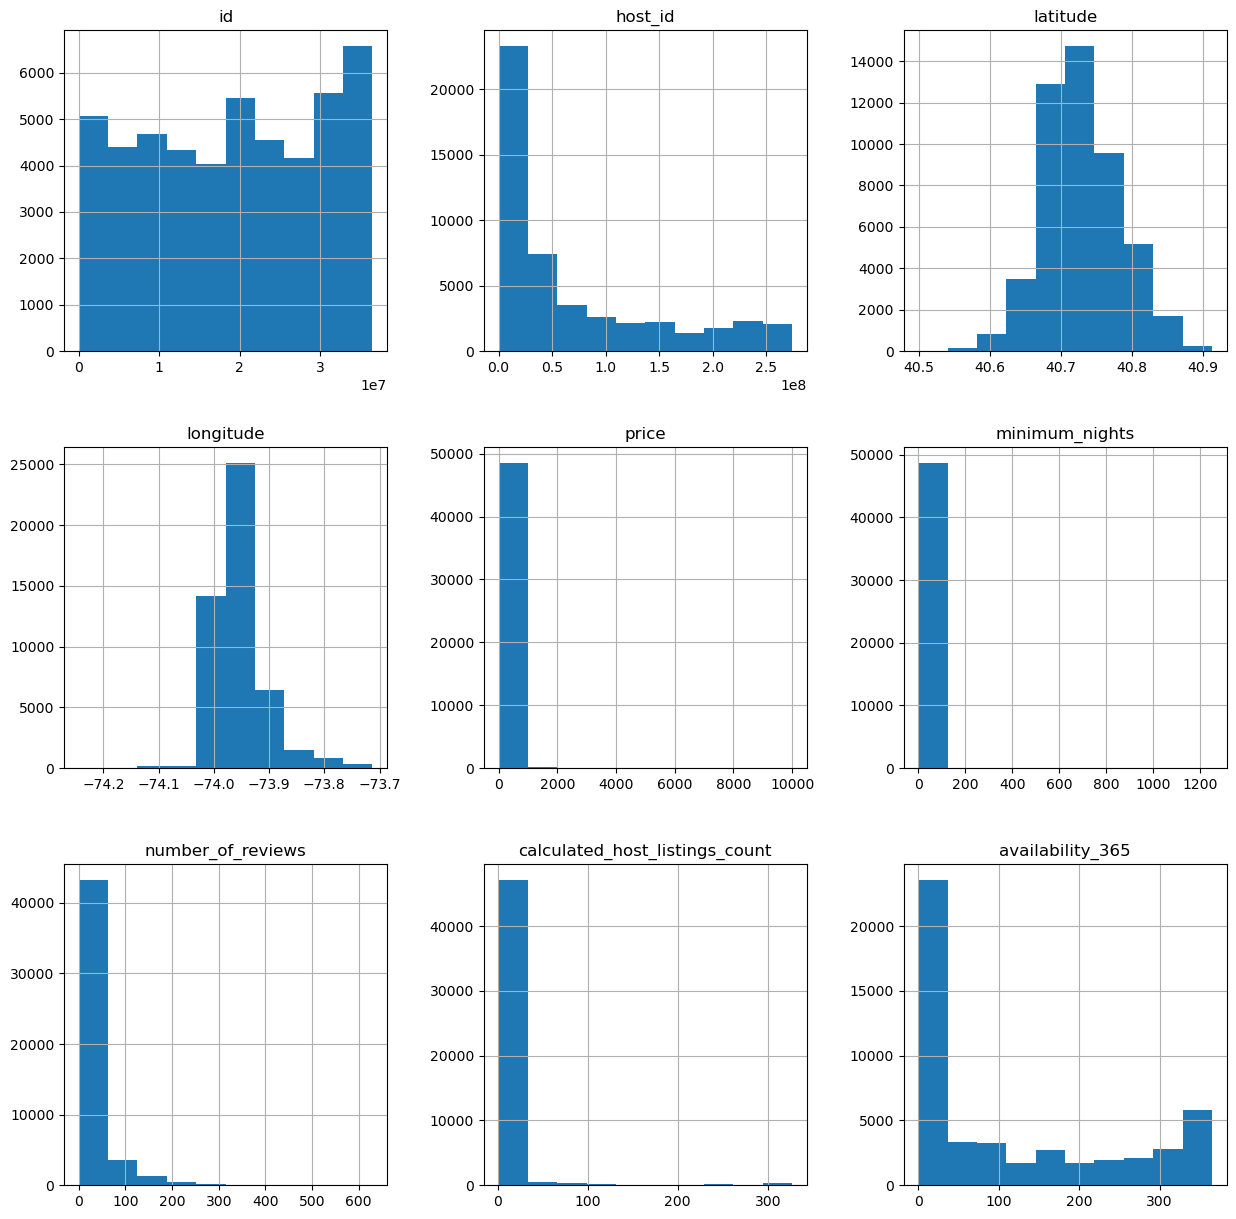

In [460]:
# Examining the histogram for visible errors and/or unexpected outliers

numeric_airbnb_df.hist(figsize=(15,15));

Using the'select_dtypes' method, we isolated columns with numerical values from the Airbnb dataset, creating a DataFrame called 'numeric_airbnb_df'. We then generated histograms to visualize the distribution of these numerical variables. This step assists in identifying any visible errors, unusual patterns, or unexpected outliers within the dataset, providing preliminary insight into the distributional characteristics of numerical features in the Airbnb data.

**We now verify that the categorical columns only contain expected values.**

In [461]:
# First, make a sub-table with only category dtype columns.
cat_col = airbnb_df.select_dtypes(include='category')
cat_col.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,private room
1,Manhattan,Midtown,entire home/apt
2,Manhattan,Harlem,private room
3,Brooklyn,Clinton Hill,entire home/apt
4,Manhattan,East Harlem,entire home/apt


In [462]:
# Examining all categorical columns for distinct values
for col in cat_col :
    print(airbnb_df[col].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', ..., 'Bull's Head', 'New Dorp', 'Rossville', 'Breezy Point', 'Willowbrook']
Length: 221
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']
['private room', 'entire home/apt', 'shared room']
Categories (3, object): ['entire home/apt', 'private room', 'shared room']


**As shown above, all categorical columns include only categories that are expected.**

# Descriptive Statistics

Descriptive statistics are essential for summarizing and comprehending data, and they are the first step in data analysis. Here's how they help us characterize and understand our datasets, like airbnb_df:

**Measures of Central Tendency:**

* **Mean:** Returns the average value, indicating the data's center.

* **Median:** The median value in a sorted list represents the middle value, which is useful in skewed distributions.

* **Mode:** The most frequently occurring value, which is necessary for comprehending common characteristics.

**Dispersion Measures:** 

* **Standard Deviation & Variance:** Standard Deviation and Variance are two measures of dispersion. Indicate the spread of the values to demonstrate the data's variability.

* **Range and Interquartile Range:** These measures the extent of spread and aid in the identification of outliers.

**Distribution Shape:**

* **Skewness:** Skewness of the distribution reveals the asymmetry of the data distribution.

* **Kurtosis:** The 'tailedness' of the distribution, indicating the presence of outliers.

**Data Analysis Importance:**

* Descriptive statistics provide a concise and insightful summary of the characteristics of a dataset.

* They form the basis of both exploratory data analysis and statistical inference.

* They aid in understanding the general behavior of respondents in the context of airbnb_df, such as average age, most common music genre, and so on.

**This preliminary understanding is critical for:**

* Recognizing patterns or anomalies.

* Providing direction for more in-depth analysis.

* Data insights are used to inform decision-making processes.

The effective use of descriptive statistics is the first step in unlocking the potential of airbnb_df, guiding analysts in making data-driven decisions and hypotheses for further investigation.

In [463]:
# Descriptive Statistics
mean_price = airbnb_df['price'].mean()
median_availability_365 = airbnb_df['availability_365'].median()
mode_number_of_reviews = airbnb_df['number_of_reviews'].mode()[0]  # Mode can return multiple values; take the first one

std_dev_id = airbnb_df['id'].std()
variance_host_id = airbnb_df['host_id'].var()
range_latitude = airbnb_df['latitude'].max() - airbnb_df['latitude'].min()
iqr_longitude = airbnb_df['longitude'].quantile(0.75) - airbnb_df['longitude'].quantile(0.25)

skewness_minimum_nights = airbnb_df['minimum_nights'].skew()
kurtosis_calculated_host_listings_count = airbnb_df['calculated_host_listings_count'].kurt()

In [464]:
# Print Descriptive Statistics with Rounding
print(f"Mean Price: {round(mean_price, 2)}")
print(f"Median Availability 365: {round(median_availability_365, 2)}")
print(f"Mode Number of reviews: {mode_number_of_reviews}")

print(f"Standard Deviation ID: {round(std_dev_id, 2)}")
print(f"Variance Host id: {round(variance_host_id, 2)}")
print(f"Range Latitude: {round(range_latitude, 2)}")
print(f"IQR Longitude: {round(iqr_longitude, 2)}")

print(f"Skewness of Minimum nights: {round(skewness_minimum_nights, 2)}")
print(f"Kurtosis of Calculated host listings count: {round(kurtosis_calculated_host_listings_count, 2)}")

Mean Price: 152.74
Median Availability 365: 45.0
Mode Number of reviews: 0.0
Standard Deviation ID: 10982893.61
Variance Host id: 6181715920341655.0
Range Latitude: 0.41
IQR Longitude: 0.05
Skewness of Minimum nights: 21.0
Kurtosis of Calculated host listings count: 67.5


These values are only meaningful when dealing with numeric columns (which is why appropriate dtypes conversions are required). The method describe provides us with additional descriptive statistics for all of them at the same time.

In [465]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


# Descriptive Statistics Provides Insights

**Mean Price:** The dataset's average price for Airbnb listings is $152.74.

**Median Availability 365:** The year-round median availability for bookings is 45 days.

**Mode Number of Reviews:** For listings, the most common number of reviews is 0.

**Spread and dispersion:**

**Listing ID Standard Deviation:** The listing ID standard deviation is approximately 10,982,893.61.

**Host ID Variance:** The host ID variance is 6,181,715,920,341,655.0.

**Latitude Coordinate Range:** The latitude coordinate range is 0.41.

**Longitude Interquartile Range:** The interquartile range for longitude is 0.05.

**Skewness and Kurtosis:**

**Minimum Nights Skewness:** The minimum night distribution has a skewness of 21.0, indicating significant rightward (positive) skewness.

**Kurtosis of Calculated Host Listings Count:** The calculated host listings count has a kurtosis of 67.5, indicating a heavy-tailed distribution with potentially extreme values.


**Overview of Descriptive Statistics:** 

The describe method provides comprehensive statistics for numeric columns, revealing insights into key attribute distribution, central tendency, and variability.

**Additional Descriptive Statistics:** 

The table displays key statistics for selected numeric columns, such as count, mean, standard deviation, minimum, 25%ile, median, 75%ile, and maximum. This data provides a more detailed breakdown of the data distribution.
These descriptive statistics provide important insights into the distribution and characteristics of numeric features in the Airbnb dataset, which are necessary for understanding the variability and central tendencies of key attributes.

# Exploratory Data Analysis

# Visualizing Price Categories Distribution:

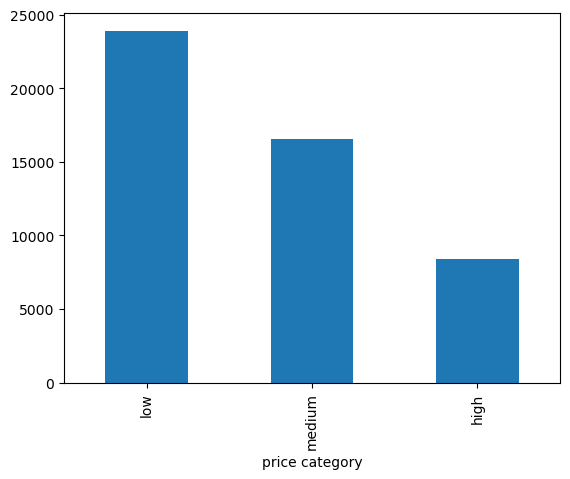

In [466]:
airbnb_df['price category'].value_counts().plot(kind='bar');

# Pie Chart of Neighbourhood Groups Distribution:

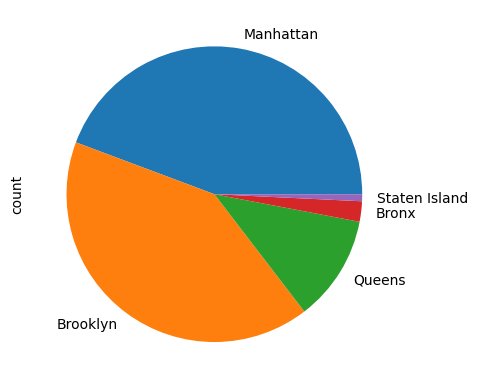

In [467]:
airbnb_df['neighbourhood_group'].value_counts().plot(kind='pie');

# Correlation Heatmap of Numeric Variables:

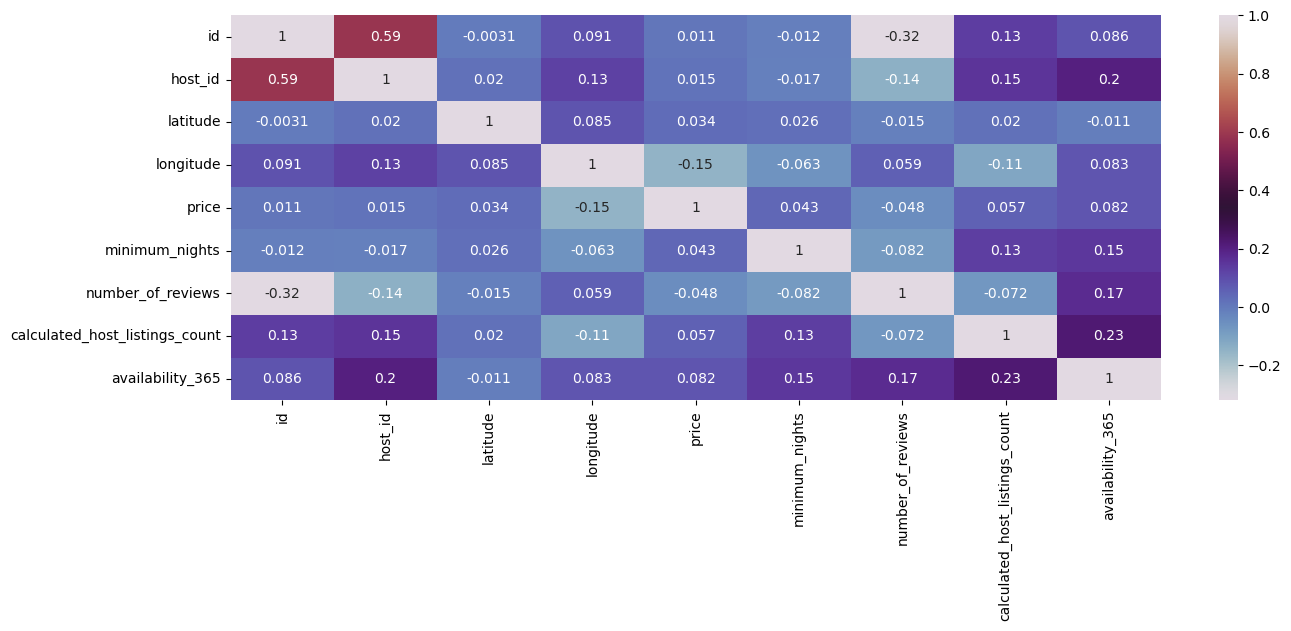

In [468]:
plt.figure(figsize=(15,5))
sns.heatmap(airbnb_df.select_dtypes(np.number).
           corr(), annot=True, cmap='twilight');

# Box Plot of Listing IDs:

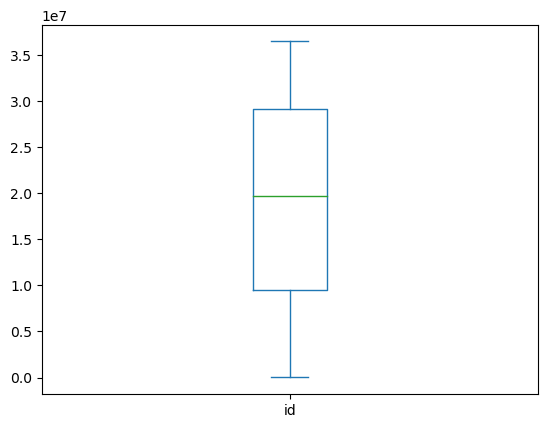

In [470]:
airbnb_df[['id']].plot(kind='box');

# Box Plot of Availability in a Year:

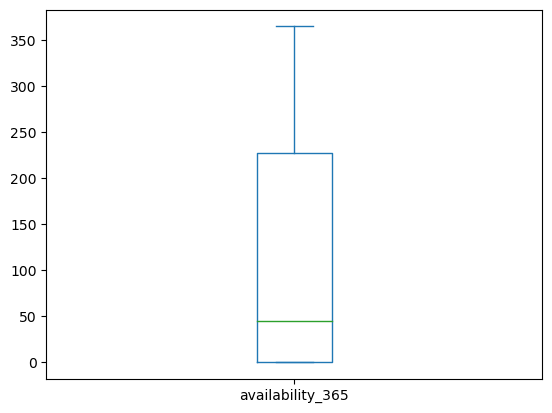

In [471]:
airbnb_df[['availability_365']].plot(kind='box');

# Price Analysis by Neighbourhood Group and Room Type:

<Axes: xlabel='neighbourhood_group', ylabel='price'>

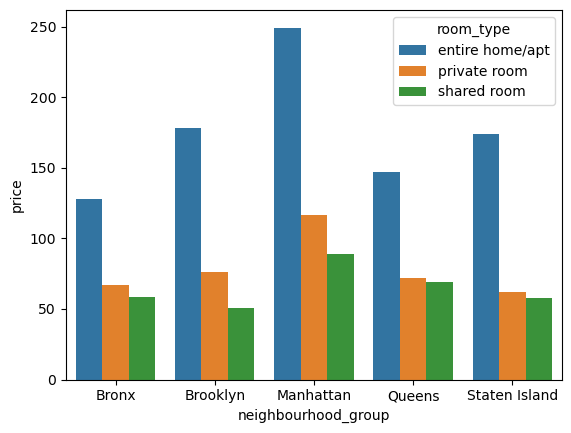

In [472]:
#Analysis of price by group and room type
df_type_price = airbnb_df.groupby(["neighbourhood_group", "room_type"]).agg(price=("price", "mean"))
df_type_price = df_type_price.reset_index()
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=df_type_price)

# Room Type Distribution Across Neighbourhood Groups:

<Axes: xlabel='neighbourhood_group', ylabel='count'>

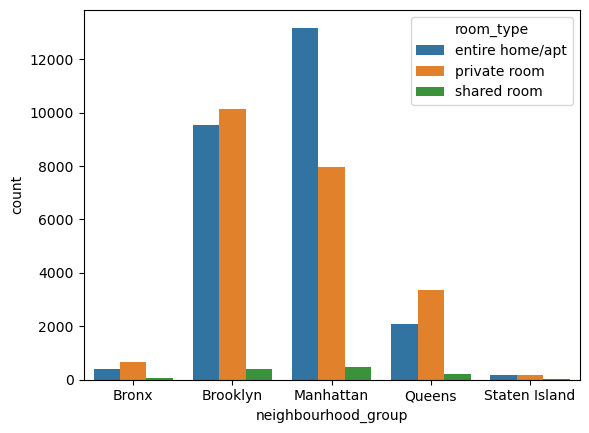

In [473]:
#Analysis of number of room of each type across neighbourhood_group
df_room_type = airbnb_df.groupby(["neighbourhood_group", "room_type"]).agg(count=("room_type", "count"))
df_room_type = df_room_type.reset_index()
sns.barplot(x="neighbourhood_group", y="count", hue="room_type", data=df_room_type)

# Average Minimum Nights by Neighbourhood Group and Room Type:

<Axes: xlabel='neighbourhood_group', ylabel='nights'>

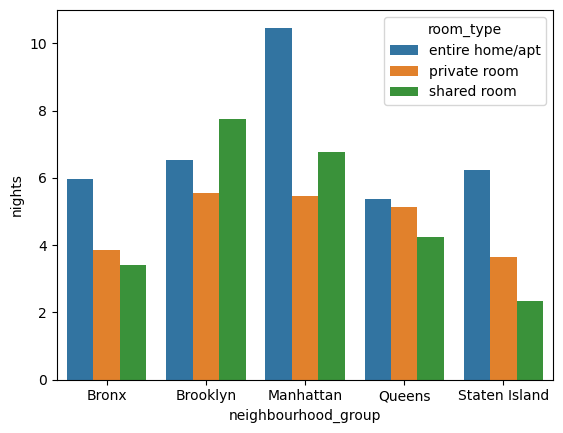

In [474]:
df_room_nights = airbnb_df.groupby(["neighbourhood_group", "room_type"]).agg(nights=("minimum_nights", "mean"))
df_room_nights = df_room_nights.reset_index()
sns.barplot(x="neighbourhood_group", y="nights", hue="room_type", data=df_room_nights)

# Average Price Analysis by Neighbourhood Group:

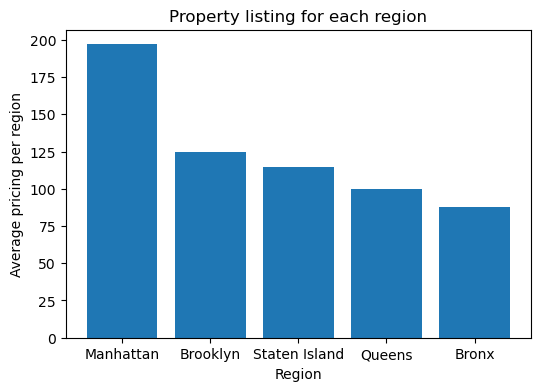

In [475]:
#Calculating the average price per region
df_group_avg_price = round(airbnb_df.groupby("neighbourhood_group").price.mean().sort_values(ascending=False),2,)

# Plotting the average price per region
fig = plt.figure(1, figsize=(6, 4))
plt.bar(df_group_avg_price.index, df_group_avg_price)
plt.title("Property listing for each region")
plt.xlabel("Region")
plt.ylabel("Average pricing per region")
plt.show()

# Maximum Price Analysis by Neighbourhood Group:

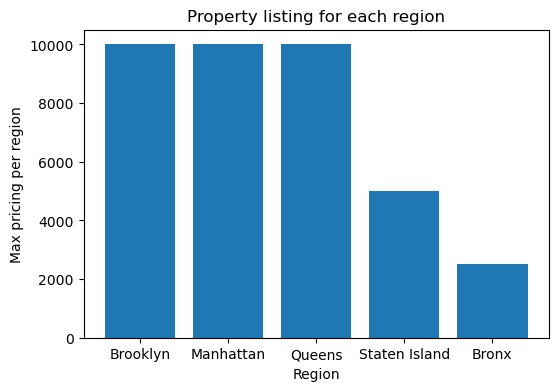

In [476]:
#Calculating the maximum price per region
df_group_max_price = round(airbnb_df.groupby("neighbourhood_group").price.max().sort_values(ascending=False),2,)
fig = plt.figure(1, figsize=(6, 4))
# Plotting the average price per region
plt.bar(df_group_max_price.index, df_group_max_price)
plt.title("Property listing for each region")
plt.xlabel("Region")
plt.ylabel("Max pricing per region")
plt.show()

# Property Count Analysis by Neighbourhood Group:

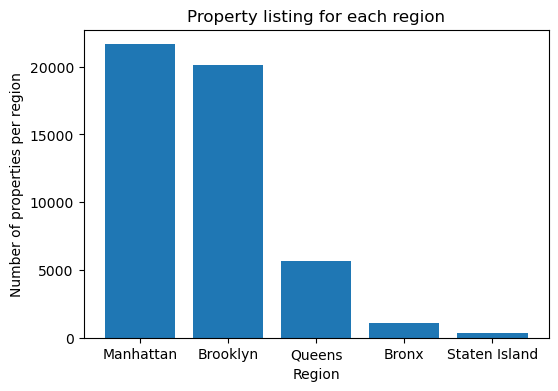

In [477]:
#Calculating the number of properties per region
df_group_region_count = round(airbnb_df.groupby("neighbourhood_group").price.count().sort_values(ascending=False),2,)

fig = plt.figure(1, figsize=(6, 4))
# Plotting the average price per region
plt.bar(df_group_region_count.index, df_group_region_count)
plt.title("Property listing for each region")
plt.xlabel("Region")
plt.ylabel("Number of properties per region")
plt.show()